## Семинар 1: MDP + CrossEntropy
### Майнор ВШЭ, 17.01.2019

Обучение с подкреплением (RL) является направлением машинного обучения и изучает взаимодействие агента, которому необходимо максимизировать долговременный выигрыш в некоторой среде. Агенту не сообщается сведений о правильности действий, как в большинстве задач машинного обучения, вместо этого агент должен определить выгодные действия самостоятельно испробовав их. Испытание действий и отсроченная награда являются основными отличительными признаками RL.

<img src="https://github.com/grafft/hse-tasks/blob/master/minor-module4/seminar1/rl_simple.png?raw=1" style="width: 400px;"/>

<img src="https://github.com/grafft/hse-tasks/blob/master/minor-module4/seminar1/rl_intro.png?raw=1" style="width: 300px;"/>

Основные составляющие модели RL:
* $s_t$ - состояние среды в момент времени $t$,
* $a_t$ - действие, совершаемое агентом в момент времени $t$,
* $r_t$ - вознаграждение, получаемое агентом при совершении действия $a_t$,
* $\pi$ - стратегия агента - последовательность действий или план.

В простейших моделях RL среда представляется в виде марковского процесса, где функция перехода определяется как $P(s' |s,a)$, что означает вероятность оказаться в состоянии $s'$ при совершении действия $a$ в состоянии $s$. Вознаграждение теперь определяется как $r(s,a,s')$.

<img src="https://github.com/grafft/hse-tasks/blob/master/minor-module4/seminar1/mdp.png?raw=1" style="width: 400px;"/>

Будем пользоваться стандартными средами, реализованными в библиотеке OpenAI Gym (https://gym.openai.com).

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
#устанавливаем библиотеки для визуализации в colab
!apt-get -qq -y install libcusparse8.0 libnvrtc8.0 libnvtoolsext1 > /dev/null
!ln -snf /usr/lib/x86_64-linux-gnu/libnvrtc-builtins.so.8.0 /usr/lib/x86_64-linux-gnu/libnvrtc-builtins.so
!apt-get -qq -y install xvfb freeglut3-dev ffmpeg> /dev/null
!pip -q install gym
!pip -q install pyglet
!pip -q install pyopengl
!pip -q install pyvirtualdisplay

import matplotlib.pyplot as plt
import matplotlib.animation
import numpy as np
from IPython.display import HTML


  

E: Unable to locate package libcusparse8.0
E: Couldn't find any package by glob 'libcusparse8.0'
E: Couldn't find any package by regex 'libcusparse8.0'
E: Unable to locate package libnvrtc8.0
E: Couldn't find any package by glob 'libnvrtc8.0'
E: Couldn't find any package by regex 'libnvrtc8.0'


In [0]:
# запускаем virtual display
from pyvirtualdisplay import Display
display = Display(visible=0, size=(1024, 768))
display.start()
import os
os.environ["DISPLAY"] = ":" + str(display.display) + "." + str(display.screen)


def show_animation(frames):
  plt.figure(figsize=(frames[0].shape[1] / 72.0, frames[0].shape[0] / 72.0), dpi = 72)
  patch = plt.imshow(frames[0])
  plt.axis('off')
  animate = lambda i: patch.set_data(frames[i])
  ani = matplotlib.animation.FuncAnimation(plt.gcf(), animate, frames=len(frames), interval = 50)
  return ani

/usr/local/lib/python3.6/dist-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
Observation space: Box(2,)
Action space: Discrete(3)


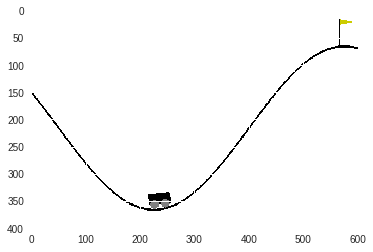

In [0]:
import gym
env = gym.make("MountainCar-v0")

plt.imshow(env.render('rgb_array'))
print("Observation space:", env.observation_space)
print("Action space:", env.action_space)
env.close()

### Gym interface

Основные методы класса __Env__:
* __reset()__ - инициализация окружения в начальном состоянии _возвращает первое наблюдение_,
* __render()__ - показать текущее состояние среды,
* __step(a)__ - выполнить действие __a__ и получить (new observation, reward, is done, info)
 * _new observation_ - новое наблюдение после выполнения действия __a__,
 * _reward_ - вознагрждение (скаляр) за выполненное действие __a__,
 * _is done_ - True, если процесс (марковский!) завершился, False иначе,
 * _info_ - дополнительная информация.

In [0]:
obs0 = env.reset()
print("initial observation code:", obs0)
print("taking action 2 (right)")
new_obs, reward, is_done, _ = env.step(2)

print("new observation code:", new_obs)
print("reward:", reward)
print("is game over?:", is_done)

initial observation code: [-0.49739125  0.        ]
taking action 2 (right)
new observation code: [-0.4965876   0.00080365]
reward: -1.0
is game over?: False


### Задание 1
Наша цель, чтобы тележка достигла флага. Модифицируйте код ниже для выполнения этого задания:

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
Well done!
You solved it!


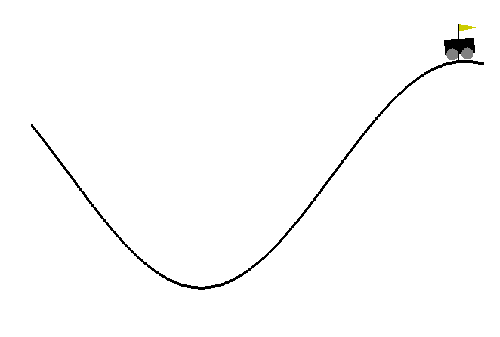

In [0]:
TIME_LIMIT = 250
env = gym.wrappers.TimeLimit(gym.envs.classic_control.MountainCarEnv(),
                             max_episode_steps=TIME_LIMIT + 1)
s = env.reset()
actions = {'left': 0, 'stop': 1, 'right': 2}

frames = []

frames.append(env.render(mode = 'rgb_array'))
for t in range(TIME_LIMIT):
    if s[1] > 0:
      s, r, done, _  = env.step(actions["right"])
    else:
      s, r, done, _  = env.step(actions["left"])
    frames.append(env.render(mode = 'rgb_array'))
    
    
    if done:
        print("Well done!")
        break
else:    
    print("Time limit exceeded. Try again.")
    
env.close()

# assert s[0] > 0.47
print("You solved it!")


HTML(show_animation(frames).to_jshtml())